In [1]:
from commons import *
import openml
import itertools as it

In [2]:
dfDatasets = pd.read_csv("data/datasets.csv")
datasetIds = sorted(pd.unique(dfDatasets["openmlid"]))

# Create Dataset Overview (LaTex)
The considered features are:
 * number of instances(ni)
 * number of attributes in total (na)
 * numeric  (nn)
 * symbolic/categorical  (ns),
 * after  binarization(nab)
 * number  of  labels  (nl), 
 * number  of  possible  values for  the  nominal  attributes  (nc),
 * total  variance  (tv), 
 * attributes  required  to  cover  50%,  90%,  95%,  and  90%  ofthe variance (vx).

In [3]:
mfFile = "data/metafeatures-derived.csv"

In [4]:
dfMetafeatures = pd.read_csv(mfFile) if path.exists(mfFile) else  pd.DataFrame([], columns=["openmlid", "name", "numinstances", "numattributes", "numericattributes", "categoricalattributes", "attributesafterbinarization", "numlabels", "numcategories", "totalvariance", "v50", "v90", "v95", "v99"])

In [5]:
dfLatex = dfMetafeatures.dropna().copy().astype({"v50": int, "v90": int, "v95": int, "v99": int}).sort_values("openmlid")
dfLatex["totalvariance"] = np.round(dfLatex["totalvariance"], 2)
dfLatex["name"] = [n[:12] + "..." if len(n) > 15 else n for n in dfLatex["name"]]

# compute number of considered fit sizes
fitsizes = [2, 4, 8, 16, 50, 75, 100, 125, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 60000, 70000, 80000, 90000, 100000]
fsCol = []
for i, row in dfLatex.iterrows():
    relevant = [fs for fs in fitsizes if fs < row["numinstances"]]
    fsCol.append(len(relevant))

In [6]:

print(dfLatex.to_latex(index=False, float_format="%.2E"))

\begin{tabular}{rlrrrrrrrrrrrr}
\toprule
 openmlid &             name &  numinstances &  numattributes &  numericattributes &  categoricalattributes &  attributesafterbinarization &  numlabels &  numcategories &  totalvariance &    v50 &    v90 &    v95 &    v99 \\
\midrule
        3 &         kr-vs-kp &      3.20E+03 &       3.70E+01 &           0.00E+00 &               3.60E+01 &                     7.50E+01 &   2.00E+00 &       6.00E+00 &       9.49E+00 &     21 &     46 &     53 &     62 \\
        6 &           letter &      2.00E+04 &       1.70E+01 &           1.60E+01 &               0.00E+00 &                     1.70E+01 &   2.60E+01 &       0.00E+00 &       8.55E+01 &      6 &     14 &     15 &     16 \\
       12 &    mfeat-factors &      2.00E+03 &       2.17E+02 &           2.16E+02 &               0.00E+00 &                     2.17E+02 &   1.00E+01 &       0.00E+00 &       9.89E+05 &     34 &     85 &     95 &    107 \\
       14 &    mfeat-fourier &      2.00E+03 &    

# Dataset Preparation

In [7]:
# read in data
df = pd.read_csv("data/runtimes/runtimes_atomic.csv")
datasets = pd.unique(df["openmlid"])
algorithms = pd.unique(df["algorithm"])
df

/home/felix/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,openmlid,totalsize,algorithm,algorithmoptions,seed,fitsize,fitattributes,numattributes,numlabels,numnumericattributes,...,numericattributesafterbinarization,totalvariance,attributestocover50pctvariance,attributestocover90pctvariance,attributestocover95pctvariance,attributestocover99pctvariance,applicationsize,fittime,applicationtimeperkinstances,error
0,3,1600.0,bayesnet,NaN,1,100,100,100.0,2.0,64.0,...,104.0,8.013500,31.0,69.0,75.0,79.0,1500.0,8,9.0,NaN
1,3,1600.0,bayesnet,NaN,0,100,1000,1000.0,2.0,964.0,...,1004.0,83.057520,448.0,864.0,920.0,967.0,1500.0,90,92.0,NaN
2,3,2000.0,bayesnet,NaN,0,500,100,100.0,2.0,64.0,...,104.0,8.856754,32.0,74.0,80.0,86.0,1500.0,53,11.0,NaN
3,3,1600.0,bayesnet,NaN,2,100,100,100.0,2.0,64.0,...,104.0,8.012842,31.0,69.0,75.0,79.0,1500.0,11,11.0,NaN
4,3,1600.0,bayesnet,NaN,0,100,2000,2000.0,2.0,1964.0,...,2004.0,165.926350,913.0,1747.0,1860.0,1955.0,1500.0,269,203.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825539,901,1001500.0,ranker_symmetricaluncertattributeeval,-N 50;-M,0,1000000,250,250.0,2.0,250.0,...,250.0,20.779243,125.0,225.0,237.0,248.0,1500.0,253822,1.0,NaN
1825540,357,1001500.0,ranker_symmetricaluncertattributeeval,-N 100;,0,1000000,250,250.0,2.0,250.0,...,250.0,88.018855,53.0,145.0,198.0,240.0,1500.0,603171,1.0,NaN
1825541,913,1001500.0,ranker_symmetricaluncertattributeeval,-N 50;-M,0,1000000,250,250.0,2.0,250.0,...,250.0,28.828961,77.0,216.0,233.0,247.0,1500.0,243575,1.0,NaN
1825542,1128,NaN,ranker_symmetricaluncertattributeeval,-N 7;-M,0,1000000,250,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,smote


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


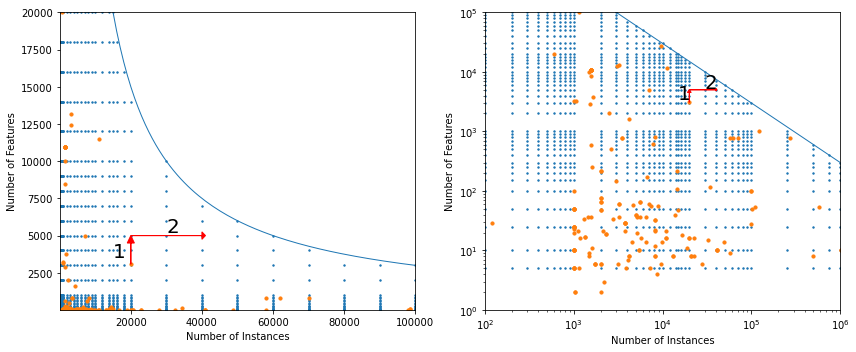

In [8]:
lim = 3 * 10**8
dom = np.linspace(0, 10**6, 1000)
P = []
XCAND = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 15000, 16000, 18000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 250000, 500000, 750000, 1000000]
YCAND = [5, 10, 25, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 14000, 16000, 18000, 20000, 25000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]
for x in XCAND:
    if x <= 10**6:
        for y in YCAND:
            prod = x * y
            if prod <= lim:
                P.append((x,y))
refPoint1 = [20000, 3072]
refPoint2 = [40000, 5000]
P = np.array(P)
fig, a = plt.subplots(1, 2, figsize=(12,5))
for i, ax in enumerate(a):
    ax.plot(dom, [lim/x for x in dom], linewidth=1)
    ax.scatter(P[:,0], P[:,1], s=2)
    ax.scatter(dfDatasets["numinstances"].values, dfDatasets["numattributes"].values, s=10)
    
    # add first aux arrow
    ax.arrow(refPoint1[0], refPoint1[1], 0, refPoint2[1] - refPoint1[1] - 500, head_width=2000, head_length=500, label="1", color="red")
    ax.text(refPoint1[0] - 5000, (refPoint2[1] + refPoint1[1]) / 2 - 500, "1", fontsize=20)
    
    ax.arrow(refPoint1[0], refPoint2[1], refPoint2[0] - refPoint1[0], 0, head_width=500, head_length=1000, label="1", color="red")
    ax.text((refPoint1[0] + refPoint2[0]) / 2, refPoint2[1] + 250, "2", fontsize=20)
    
    if i == 0:
        ax.set_xlim([100, 10**5])
        ax.set_ylim([1, 2*10**4])
    elif i == 1:
        ax.set_xlim([100, 10**6])
        ax.set_ylim([1, 10**5])
        ax.set_xscale("log")
        ax.set_yscale("log")
    ax.set_xlabel("Number of Instances")
    ax.set_ylabel("Number of Features")
fig.tight_layout()
fig.savefig("plots/grid.pdf")
plt.show()

# Identify 10 Representative Datasets

In [9]:
clusterFilter = (dfMetafeatures["numinstances"] <= 10000) & (dfMetafeatures["numattributes"] <= 100)
dfClustering = dfMetafeatures[clusterFilter][['numericattributes', 'categoricalattributes', 'attributesafterbinarization', 'numlabels', 'numcategories', 'totalvariance', 'v50', 'v90', 'v95', 'v99']]
print("Including " + str(len(dfClustering)) + " datasets into clustering.")

Including 93 datasets into clustering.


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [11]:
scores = {}

for i in tqdm(range(100)):
    kMeans = KMeans(n_clusters=10, algorithm="full")
    normalizedData = normalize(dfClustering.values)
    kMeans.fit(normalizedData)
    for label in np.unique(kMeans.labels_):
        indicesInCluster = np.where(kMeans.labels_ == label)[0]
        center = np.mean(normalizedData[indicesInCluster], axis=0)
        bestRepresentative = None
        lowestDistance = np.inf
        for index in indicesInCluster:
            dist = np.linalg.norm(normalizedData[index] - center)
            if dist < lowestDistance:
                bestRepresentative = index
                lowstDistance = dist
        if not bestRepresentative in scores:
            scores[bestRepresentative] = 0
        scores[bestRepresentative] += 1

bestScores = sorted(sorted(scores, key=lambda k: scores[k], reverse=True)[:10])
for index in bestScores:
    print("{\sc " + dfMetafeatures.iloc[index]["name"].replace("_", "-") + "} (" + str(dfMetafeatures.iloc[index]["openmlid"]) + "), ")


{\sc kr-vs-kp} (3), 
{\sc hypothyroid} (57), 
{\sc rmftsa-sleepdata} (741), 
{\sc fri-c1-1000-5} (743), 
{\sc quake} (772), 
{\sc fri-c3-1000-5} (813), 
{\sc fri-c2-1000-25} (903), 
{\sc fri-c0-1000-50} (904), 
{\sc balloon} (914), 
{\sc visualizing-soil} (923), 


Number of instances for limit 1000000: 48
Number of instances for limit 5000000: 33
10000 x 300.0
Number of instances for limit 10000000: 27
10000 x 750.0
Number of instances for limit 100000000: 4
10000 x 5500.0


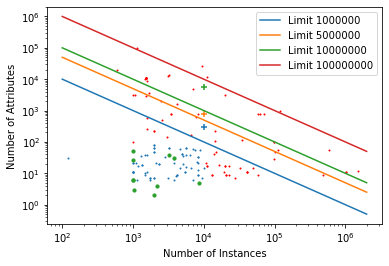

In [12]:
fig, ax = plt.subplots()
PIncludedButNotChosen = [i for i, included in enumerate(clusterFilter) if included and not i in bestScores]
PExcluded  = [i for i, included in enumerate(clusterFilter) if not included]
colInstances = dfMetafeatures["numinstances"].values
colAttributes = dfMetafeatures["numattributes"].values
limitDomain = np.array([100, 2*10**6])
limits = [10**6, 5 * 10**6, 10**7, 10**8]
for lIndex, limit in enumerate(limits):
    print("Number of instances for limit " + str(limit) + ": " + str(len(dfMetafeatures[(dfMetafeatures["numinstances"] * dfMetafeatures["numattributes"] > limit)])))
    ax.plot(limitDomain, limit / limitDomain, label="Limit " + str(limit))
    if lIndex > 0:
        meanLimit = (limit + limits[lIndex - 1]) / 2
        meanX = 10**4
        meanY = meanLimit / meanX
        print(meanX, "x", meanY)
        ax.scatter([meanX], [meanY], marker="+")
        
ax.scatter(colInstances[PIncludedButNotChosen], colAttributes[PIncludedButNotChosen], color="C0", s=1)
ax.scatter(colInstances[PExcluded], colAttributes[PExcluded], color="red", s=1)
ax.scatter(colInstances[bestScores], colAttributes[bestScores], color="C2", s=10)
ax.set_xlabel("Number of Instances")
ax.set_ylabel("Number of Attributes")
ax.set_xscale("log")
ax.set_yscale("log")
ax.legend()

fig.savefig("plots/coredatasets.pdf")

In [13]:
print("Use the following openmlids for training: " + str([dfMetafeatures.iloc[i]["openmlid"] for i in bestScores]))

Use the following openmlids for training: [3, 57, 741, 743, 772, 813, 903, 904, 914, 923]


# Overall Runtime Distribution

In [14]:
T = [(x + 1)**2 for x in range(100)]
Mfit = []
Mapp = []
L = len(df)
T.append(10**4)
for t in tqdm(T):
    Mfit.append(len(df.query("fittime <= " + str(t))) / L)
    Mapp.append(len(df.query("applicationtimeperkinstances <= " + str(t))) / L)

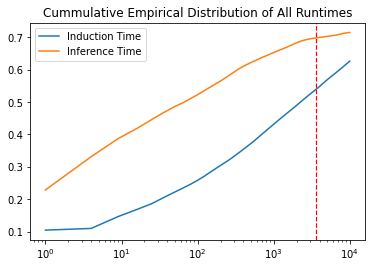

In [15]:
plt.figure()
plt.plot(T, Mfit)
plt.plot(T, Mapp)
plt.xscale("log")
plt.axvline(3600, color="red", linestyle="--", linewidth="1.2")
plt.legend(["Induction Time", "Inference Time"])
plt.title("Cummulative Empirical Distribution of All Runtimes")
plt.savefig("plots/runtimedistributions.pdf")
plt.show()